# Question 4 Part 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Read the CSV file
df = pd.read_csv('/workspaces/COMPSCI 671D workspace/src/main_workspace/data/german_credit.csv')

#Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (800, 41)
Test set shape: (200, 41)


# 4a.

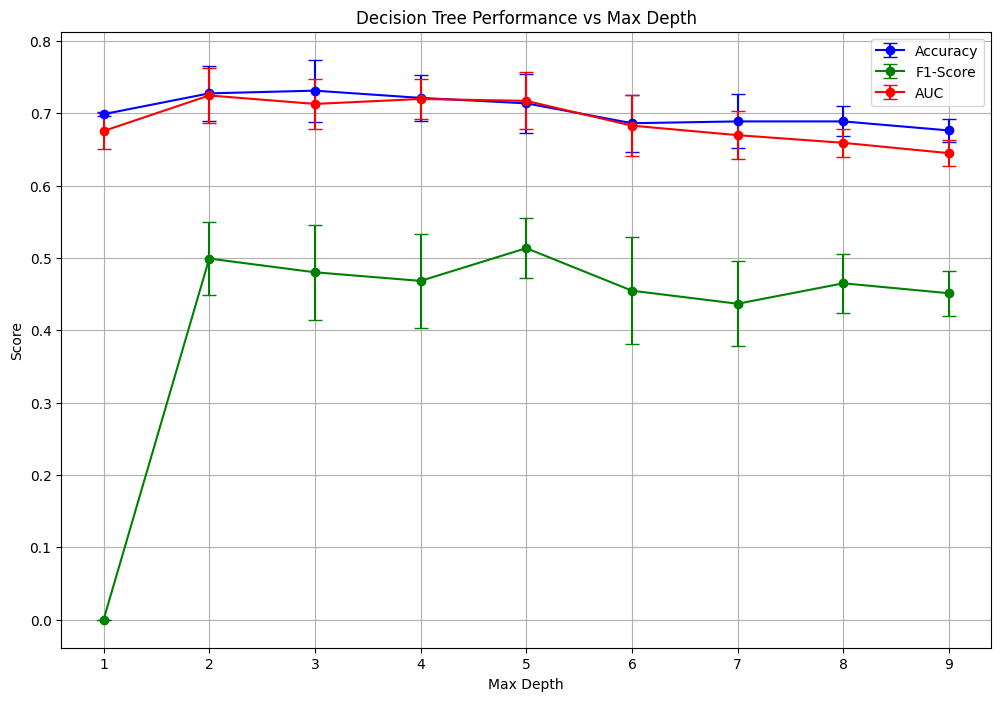

In [2]:
# Define the range of max_depth values to test
max_depths = range(1, 10)

# Initialize lists to store the scores
accuracy_scores = []
f1_scores = []
auc_scores = []

##Define scorers for cross-validation
scorers = ("accuracy","f1","roc_auc")

# Perform cross-validation for each max_depth value
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    results = cross_validate(clf, X_train, y_train, scoring=scorers ,cv=5)
    accuracy = results["test_accuracy"]
    f1 = results["test_f1"]
    auc = results["test_roc_auc"]
    accuracy_scores.append((np.mean(accuracy), np.std(accuracy)))
    f1_scores.append((np.mean(f1), np.std(f1)))
    auc_scores.append((np.mean(auc), np.std(auc)))


# Plot the results
plt.figure(figsize=(12, 8))

metrics = [accuracy_scores, f1_scores, auc_scores]
metric_names = ['Accuracy', 'F1-Score', 'AUC']
colors = ['blue', 'green', 'red']

for (metric, name, color) in (zip(metrics, metric_names, colors)):
    means, errors = zip(*metric)
    plt.errorbar(max_depths, means, yerr=errors, fmt='-o', color=color, label=name, capsize=5)

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()


Given the data, is heavily unbalanced (70% are target 0) accuracy and ROC-AUC would be hard to use.
Also according to data_doc: 
It is worse to class a customer as good when they are bad (5), 
than it is to class a customer as bad when they are good (1).

Therefore, as the data is heavy unbalanced and we mostly care about positive predictions F1 is best.

Now given that the best f1 was seen at depth 5 I would use that depth for my 'best' model.

# 4b.

Best parameters: {'class_weight': {0: 1, 1: 1.1}, 'max_depth': 5, 'min_samples_leaf': 4}


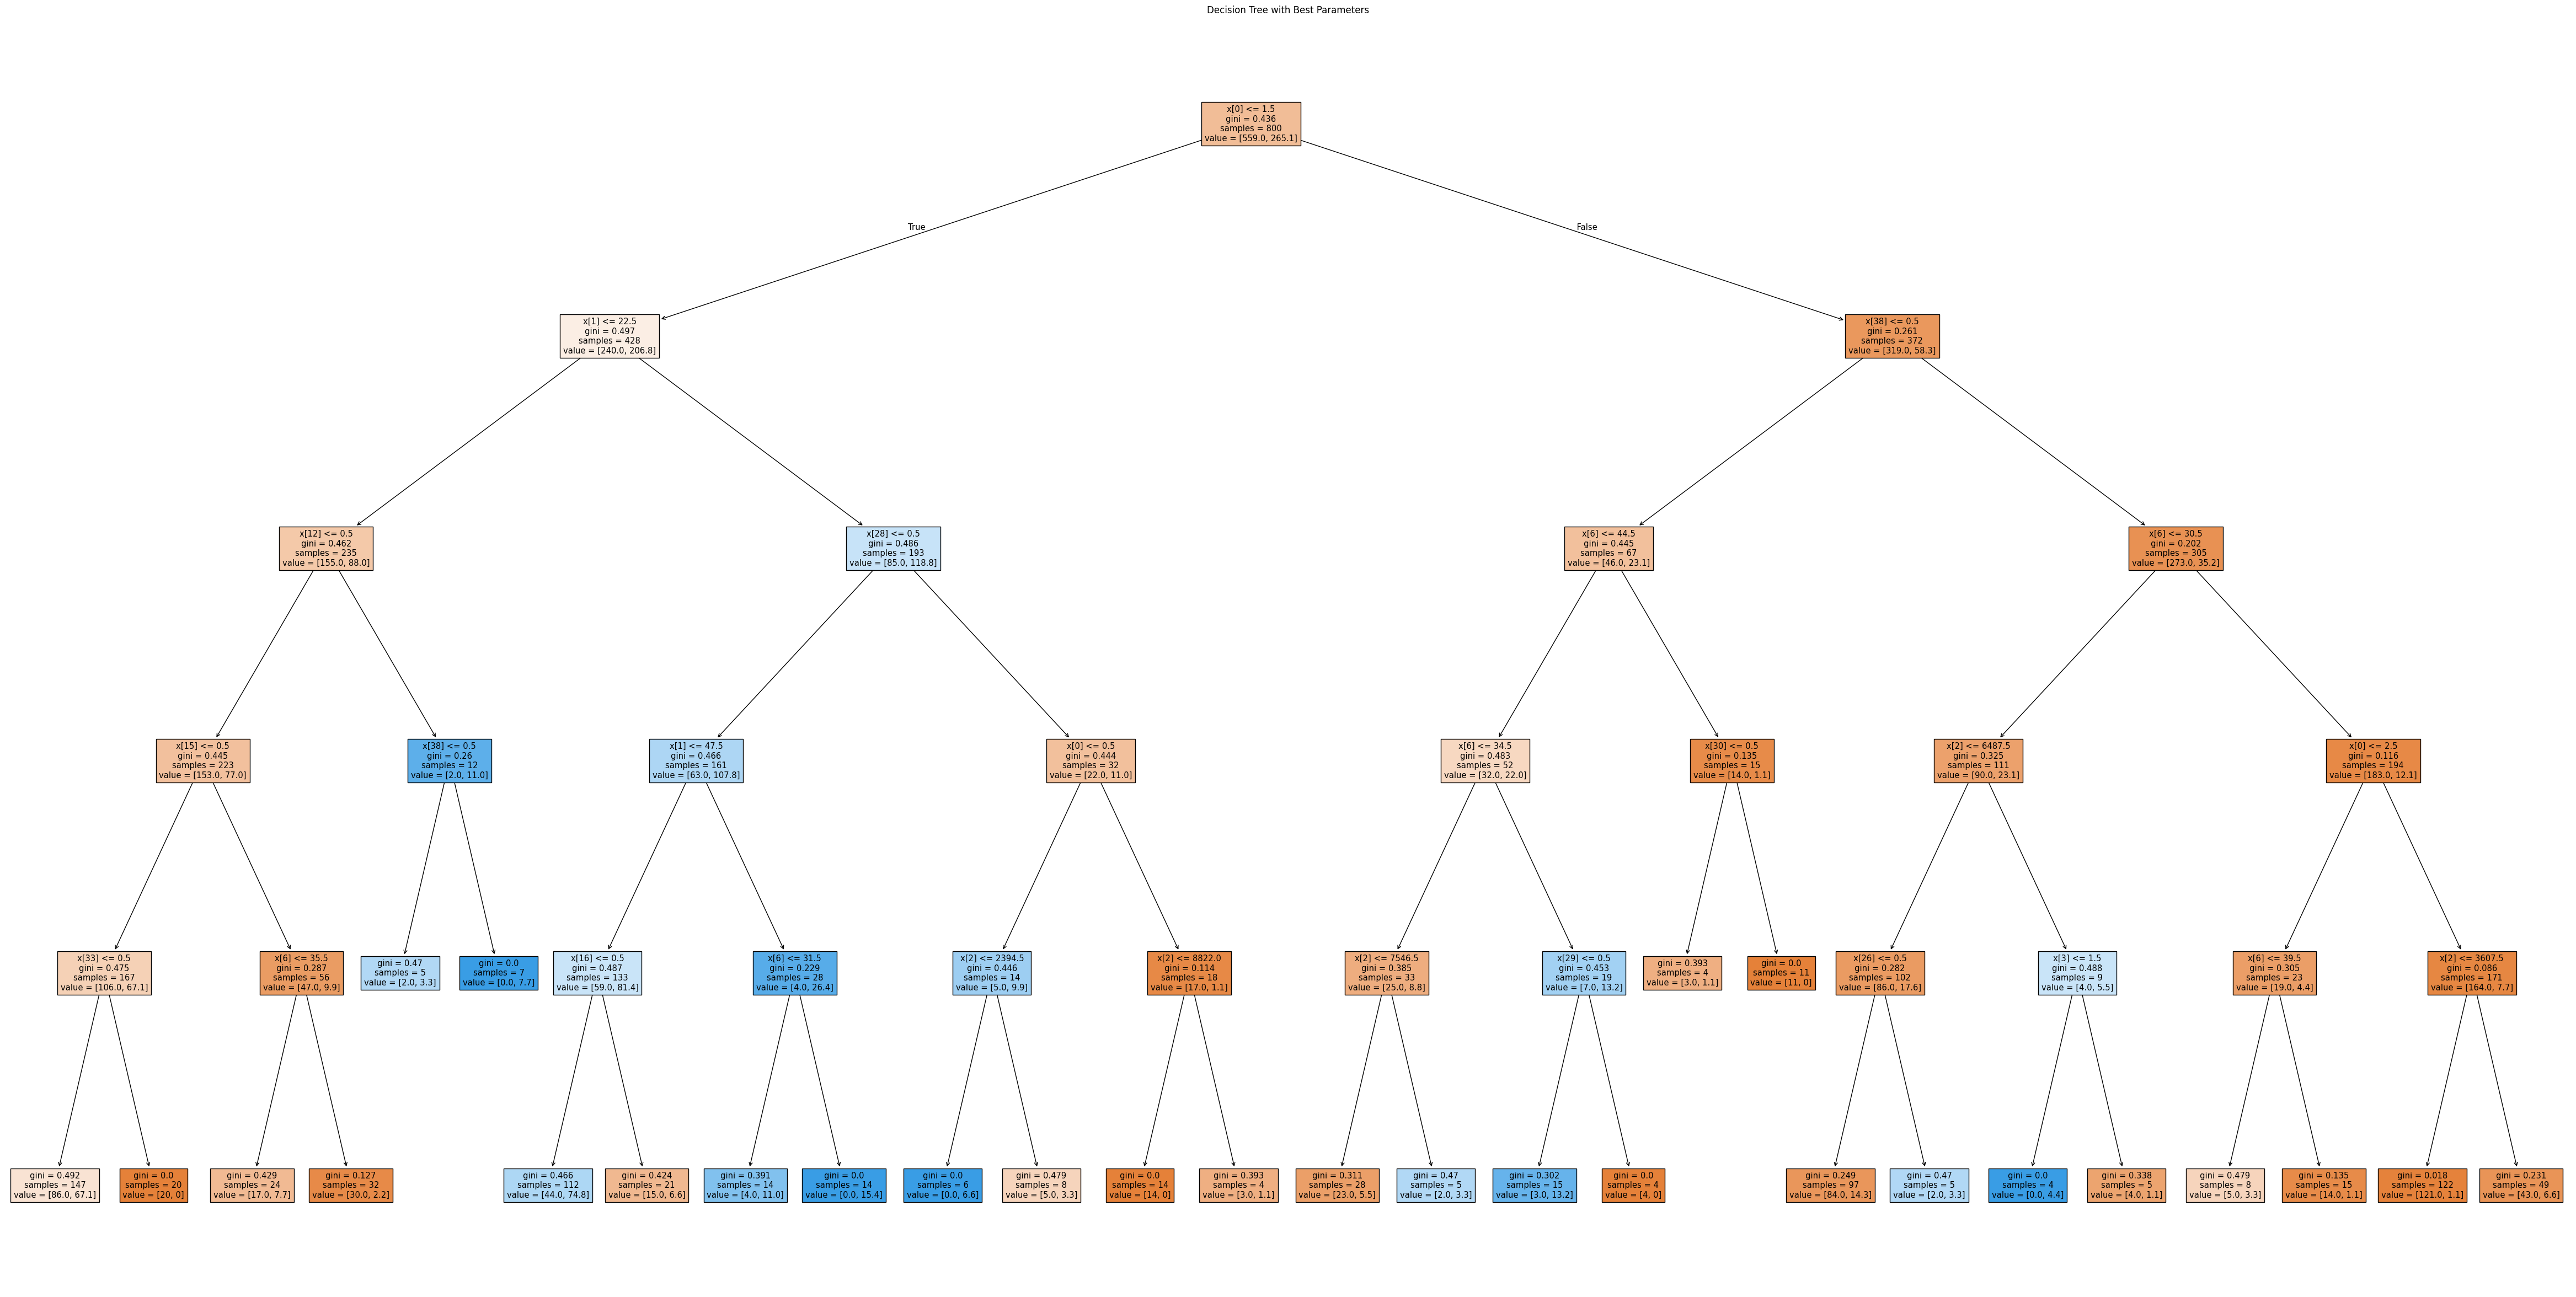

F1 Score: 0.5234
Accuracy: 0.7450
AUC: 0.6664


: 

In [3]:



# Define the parameter grid
param_grid = {
    'max_depth': [2, 5, 8], # use the stuff around 5
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 1.1}, {0: 1.1, 1: 1}],  # Favoring,
    'min_samples_leaf': [2, 4, 8]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1', 
    n_jobs=-1, # go faster
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and train a new decision tree on the entire training set
best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(60, 30))
plot_tree(best_tree, filled=True)
plt.title("Decision Tree with Best Parameters")
plt.show()

# Evaluate the model on the test set
y_pred = best_tree.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")


sklearn.model_selection.StratifiedKFold


In [4]:
#from gosdt.model import GOSDT
from gosdt import GOSDT


config = {
            "regularization": 0.01,
            "depth_budget": 5,
            "balance": True
        }

model = GOSDT(config)
model.fit(X, y)
print("evaluate the model, extracting tree and scores", flush=True)
acc = model.predict(X, y)